
## Density-based Methods of Clustering

**Francis James Corpuz and Christian Alis**

The clustering methods discussed in DMW used the notion of distance to determine clusters. In this notebook, we will look at another class of clustering methods that uses density for determining clusters.

A disadvantage of most of the clustering methods we discussed so far is that they can only find spherical-shaped clusters and encounter difficulty in discovering clusters of arbitrary shapes. With density-based clustering methods, the shapes can be more arbitrary. 

Consider the examples below.

<div style="text-align: center">
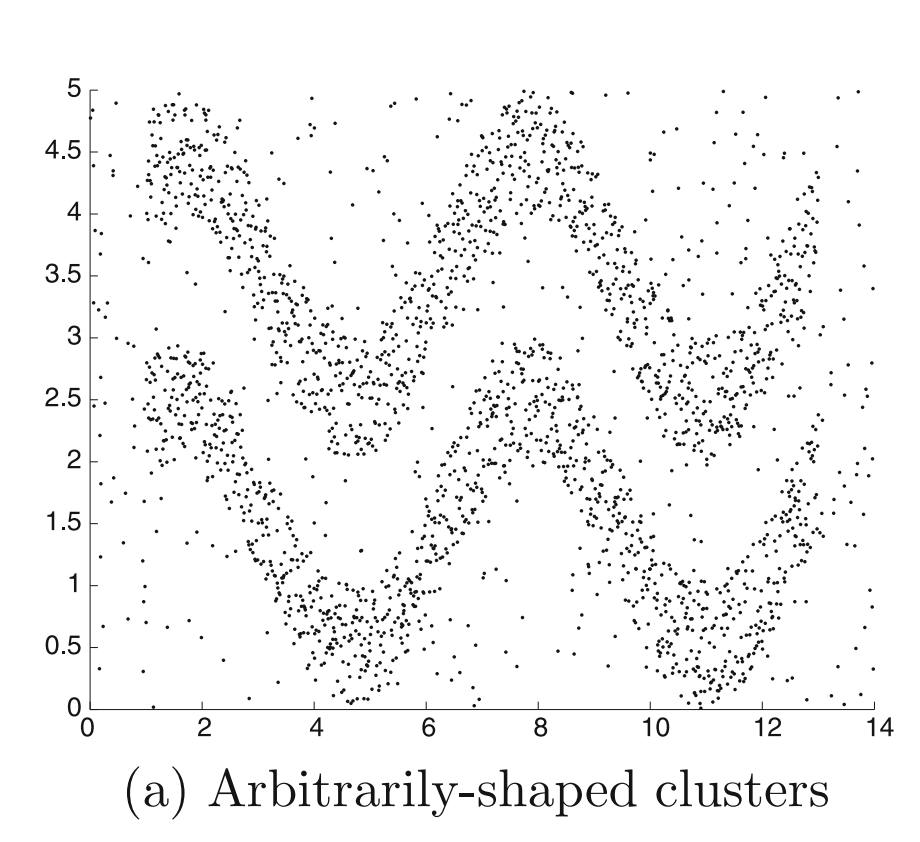
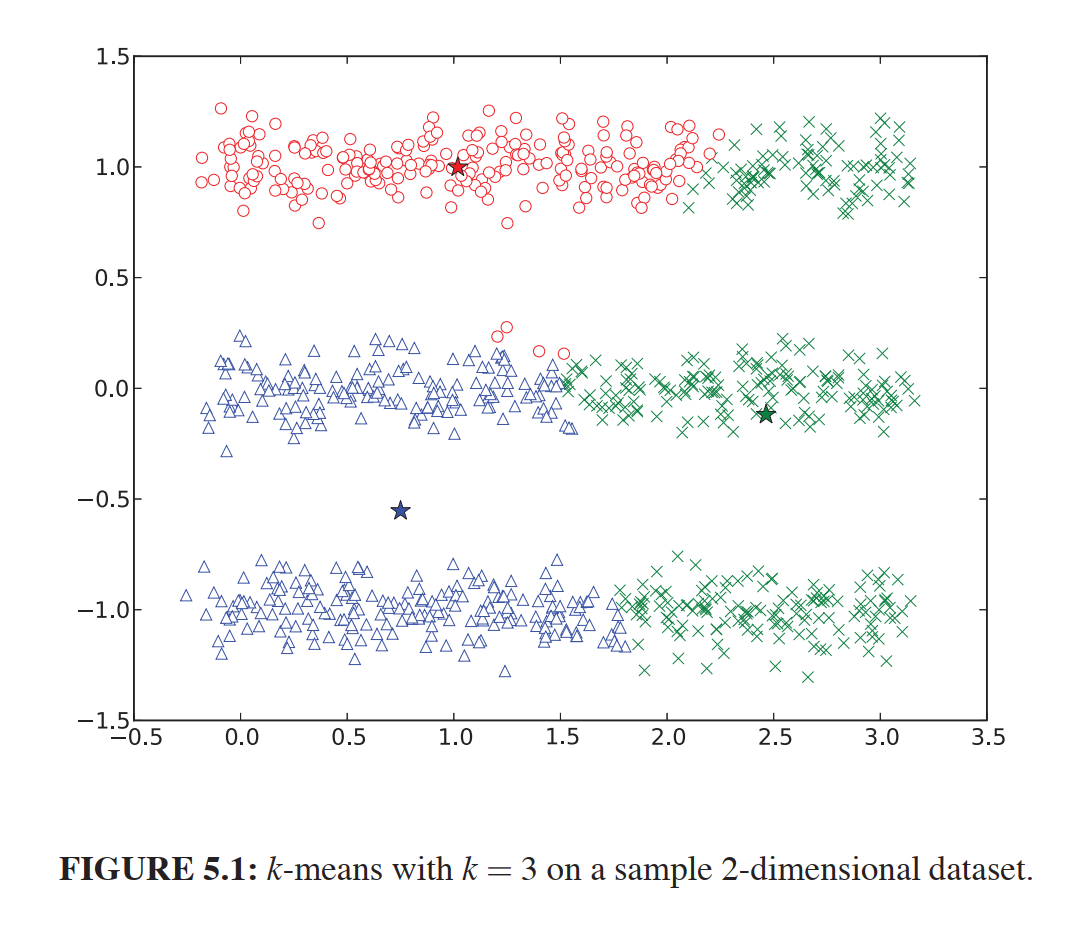
</div>

Visually, we can see three wavy clusters on the left and three rectangles on the right. However, as shown, $k$-means fails to find the clusters. Thinking through how we got the three clusters visually, we are able to do so because we find these clusters because they are denser than the surrounding areas. That is the idea behind density-based clustering methods.

More precisely, the general idea is to continue growing a given cluster as long as the density (number of objects or
data points) in the "neighborhood" exceeds some threshold. For example, for each data point within a given cluster, the neighborhood of a given radius has to contain at least a minimum number of points. Such a method can be used to filter out noise or outliers and discover clusters of arbitrary shape.

Density-based methods can divide a set of objects into multiple exclusive clusters, or a hierarchy of clusters. Typically, density-based methods consider exclusive clusters only, and do not consider fuzzy clusters. Moreover, density-based methods can be extended from full space to subspace clustering.

## Density-based Spatial Clustering of Applications with Noise (DBSCAN)

DBSCAN is the most popular density-based clustering algorithm. It first removes nondense points--those that have fewer than $k$ neighbors within a distance of $\epsilon$. Then, single-link agglomeration is employed to cluster the remaining points. Nondense points may be allocated to one of the clusters according to some criterion, and those that were left are labeled as noise.

Let us now go through the general algorithm in detail.

In DBSCAN, each point is labeled as one of the following:

* **core point**: points that have at least $MinPts$ in its neighborhood
* **border point**: points that do not have at least $MinPts$ neighbors but have a core point as its neighbor
* **noise point**: points that do not have at least $MinPts$ neighbors and do not have a core point as its neighbor

DBSCAN first finds core objects and their neighborhoods to form dense regions / clusters. The parameter $\epsilon$ is used to define the radius of a neighborhood we consider for every object. The $\epsilon$-neighborhood of an object $o$ is the space between a radius of $\epsilon$ centered at object $o$

Given a set $D$ of objects, we can identify and label all core objects in the data set, given the parameters $\epsilon$ and $MinPts$. The clustering tasks is therein reduced to using core objects and their respective neighborhoods to form dense regions, where the dense regions are clusters.

For a core object $q$ and an object $p$, we say that p is directly **density-reachable** from q (with respect to $\epsilon$ and $MinPts$) if $p$ is within the $\epsilon$-neighborhood of $q$. Clearly, an object $p$ is directly density-reachable from another object $q$ if and only if $q$ is a core object and $p$ is in the $\epsilon$-neighborhood of $q$. Using the directly density-reachable relation, a core object can “bring” all objects from its $\epsilon$-neighborhood into a dense region.

In DBSCAN, $p$ is **density-reachable** from $q$ (with respect to $\epsilon$ and MinPts in D) if there is a chain of objects $p_1$,...,$p_n$, such that $p_1$ = $q$, $p_q$ = $p$, and $p_{i+1}$ is directly density-reachable from $p_i$ with respect to $\epsilon$ and $MinPts$, for 1 ≤$ $i ≤ $n$, $p_i$ $\in$ $D$. Note that density-reachability is not an equivalence relation because it is not symmetric. If both $o_1$ and $o_2$ are core objects and $o_1$ is density-reachable from $o_2$, then $o_2$ is density-reachable from $o_1$. However, if $o_2$ is a core object but $o_1$ is not, then $o_1$ may be density-reachable from $o_2$, but not vice versa.

To connect core objects as well as their neighbors in a dense region, DBSCAN uses the notion of density-connectedness. Two objects $p_1$,$p_2$ $\in$ $D$ are **density-connected** with respect to $\epsilon$ and $MinPts$ if there is an object $q$ $\in$ $D$ such that both $p_1$ and $p_2$ are **density reachable** from $q$ with respect to $\epsilon$ and $MinPts$. Unlike density-reachability, density connectedness is an equivalence relation. It is easy to show that, for objects $o_1$, $o_2$, and $o_3$, if $o_1$ and $o_2$ are density-connected, and $o_2$ and $o_3$ are density-connected, then so are $o_1$ and $o_3$.


<div>
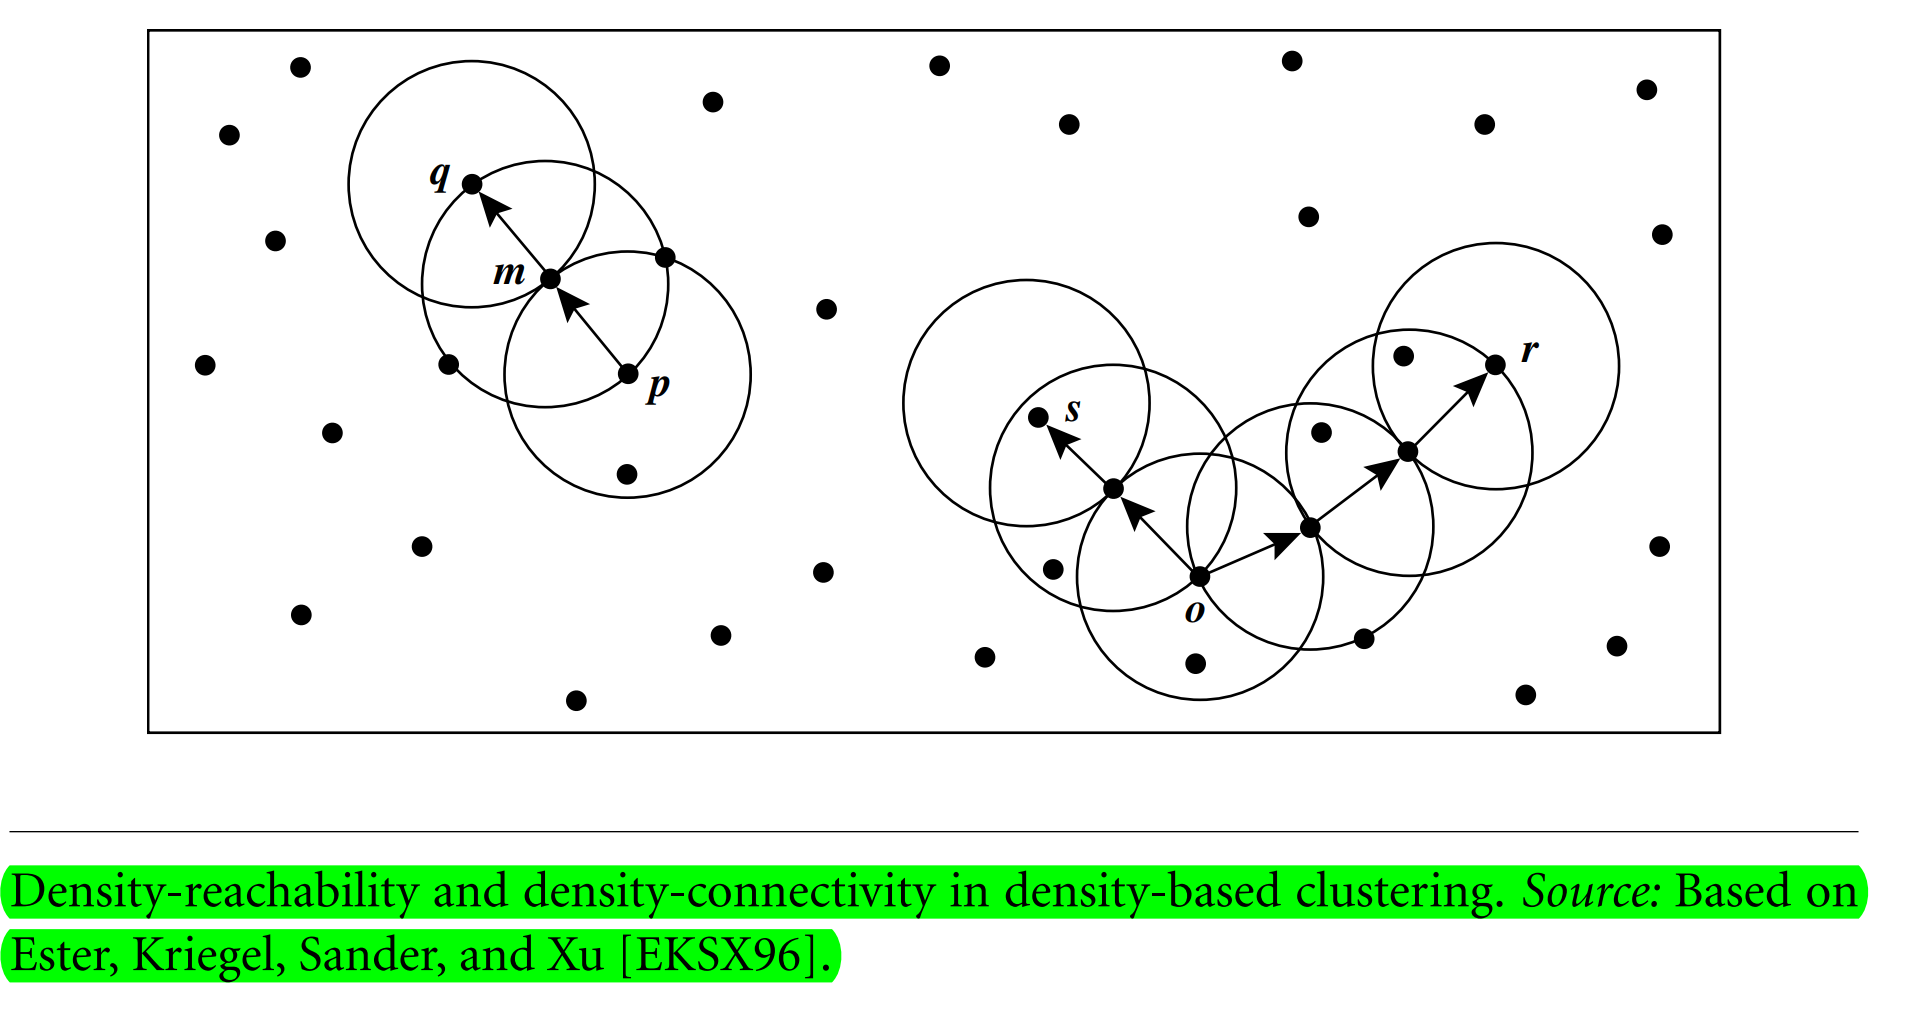
</div>


An algorithm that can be used for implementing DBSCAN is shown below.

**Algorithm**: *DBSCAN*: a density-based clustering algorithm <br>
**Input**:
- $D$: a dataset containing $n$ objects
- $\epsilon$ : the radius parameter
- $MinPts$: the neighborhood density threshold
**Output**: A setof density-based clusters <br>
**Method**: <br>
$\quad$ mark all objects as **unvisited**; <br>
$\quad$ **do** <br>
$\quad$$\quad$randomly select an unvisited object **$p$**;  <br>
$\quad$$\quad$mark **$p$** as **visited**;  <br>
$\quad$$\quad$**if** the $\epsilon$-neighborhood of **$p$** has at least $MinPts$ objects <br>
$\quad$$\quad$$\quad$create new cluster $C$, and add **$p$** to $C$; <br> 
$\quad$$\quad$$\quad$let $N$ be the set of objects in the $\epsilon$-neighorhood of **$p$**; <br> 
$\quad$$\quad$$\quad$for each point **$p'$** in $N$ <br>
$\quad$$\quad$$\quad$$\quad$if **$p'$** is **unvisited** <br>
$\quad$$\quad$$\quad$$\quad$$\quad$mark **$p'$** as **visited**; <br>
$\quad$$\quad$$\quad$$\quad$$\quad$if the $\epsilon$-neighorhood of **$p'$** has at least $MinPts$ points, <br>
$\quad$$\quad$$\quad$$\quad$$\quad$add those points to $N$;<br>
$\quad$$\quad$$\quad$$\quad$if **$p'$** is not yet a member of any cluster, add **$p'$** to $C$; <br>
$\quad$$\quad$$\quad$**end for** <br>
$\quad$$\quad$output C; <br>
$\quad$$\quad$**else** mark **$p$** as **noise**; <br>
$\quad$**until** no object is unvisited;  <br>
**end**

If spatial index is used, the computational complexity of DBSCAN is **$O(nlogn)$**, where $n$ is the number of database objects. Otherwise, the complexity is **$O(n^2)$**

In [ ]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons

from sklearn.preprocessing import StandardScaler

In [ ]:
# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

In [ ]:
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))



In [ ]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
# #############################################################################
# Generate sample data
X, labels_true = make_circles(n_samples=100, shuffle=True, noise=None, random_state=None, factor=0.4)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=3).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


In [ ]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
# #############################################################################
# Generate sample data
X, labels_true = make_moons(n_samples=100, shuffle=True, noise=None, random_state=None)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=3).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

In [ ]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

**Exercise 1 [3 pts]**

Perform $k$-means clustering on the `pickup_longitude`, `pickup_latitude`, `dropoff_longitude` and `dropoff_latitude` of `/mnt/data/public/nyctaxi/trip_data/trip_data_4.csv`. Clean data as appropriate. Justify choice of hyperparameters.

**Exercise 2 [3 pts]**

Perform DBSCAN on the `pickup_longitude`, `pickup_latitude`, `dropoff_longitude` and `dropoff_latitude` of `/mnt/data/public/nyctaxi/trip_data/trip_data_4.csv`. Clean data as appropriate. Justify choice of hyperparameters.

**Exercise 3 [2 pts]**

Compare the results of Exercises 1 and 2. Based on these, what are the advantages and disadvantages of each method ($k$-means and DBSCAN).

# References

* Charu C. Aggarwal, "Data Mining, The Textbook", 2015 Springer
* Han, Kamber, Pei, "Data Mining, Concepts and Techniques", 3rd Ed. 2012 Elsevier
* Aggarwal and Reddy, "Data Clustering: Algorithms and Applications, 2014, CRC Press